In [1]:
import numpy as np
import time

from Functions.Metropolis import *
from Functions.errorcalc import *
from Functions.Minimalization import *
from Functions.PlotFigures import *
import Systems.HarmonicOscillator  as Oscillator
import Systems.Hatom as Hydrogen
import Systems.Helium as Helium

def minimalEnergyFinder(alpha_guess, N_walkers, N_tries, System, plot_settings):
    """ For a given system finds the optimal ground state energy.

    Parameters
    ----------
    alpha_guess:            int; first value of alpha
    N_walkers:              Number of random walkers placed
    N_tries:                Number of steps for the walkers to try
    System:                 current system. Can choose between: oscillator, Hydrogen or Helium
    plots:                  True or False to plot the results


    """
    start_time = time.time()
    
    alpha, count, E_loc , E_a= minimalAlphaFinder(alpha_guess, N_tries, N_walkers, System)

    E_var = np.zeros(len(alpha))
    E_error = np.zeros(len(alpha))
    var_error = np.zeros(len(alpha))

    for i in range(len(alpha)):
       E_error[i], E_var[i], var_error[i] = bootstrapError(E_loc[i,:,0], 100)

    alpha_min = alpha[-1]
    E_min = E_a[-1]

    print()
    print("The energy was found to be minimal with \N{greek small letter alpha} = {}".format(alpha_min))
    print("The corresponding Energy is E = {} +/- {}".format(E_min, E_error[-1]))
    print("With variance var = {} +/- {} ".format(E_var[-1], var_error[-1]))

    
    # plots
    plots = plot_setting[0]
    subplots = plot_setting[1]
    plotsave = plot_setting[2]
    
    if plots == True and subplots == False:
        plotMinumumAlpha(alpha, count)
        plotEnergy(alpha, E_a, E_error)
        plotVariance(alpha, E_var, var_error)  
        
    elif plots == False and subplots == True:
        subplotEnergyVarianceAlpha(alpha, E_a, E_error, E_var, var_error, count, plotsave)

    elapsed_time = time.time() - start_time
    print(f"time taken for simulation : {elapsed_time} s")



This cell will give the optimal Ground state energy of the Harmonic oscillator system:

alpha: 0.9938470365068552, iteration: 1
alpha: 0.8063568514039723, iteration: 2
alpha: 0.6525922052769819, iteration: 3
alpha: 0.5492591408167672, iteration: 4
alpha: 0.5064457049564599, iteration: 5
alpha: 0.5000619165888854, iteration: 6
alpha: 0.5000003494114347, iteration: 7

The energy was found to be minimal with α = 0.5000003494114347
The corresponding Energy is E = 0.5000001169839112 +/- 8.791843246492696e-07
With variance var = 7.61926770180907e-09 +/- 2.647587671783757e-10 


Name your plot(without filetype):  min_Oscillator


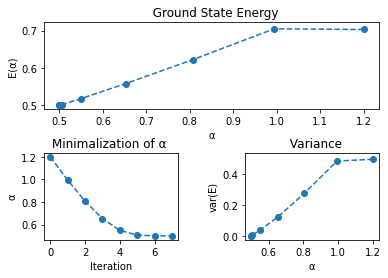

time taken for simulation : 35.83153963088989 s


In [5]:
print("This cell will give the optimal Ground state energy of the Harmonic oscillator system:")
print()

# System parameters
System = Oscillator
N_tries = 30000
N_walkers = 400
alpha_guess = 1.2

# plot settings
plots = False
subplots = True
plotsave = True
plot_settings = [plots subplots plotsave]

minimalEnergyFinder(alpha_guess, N_walkers, N_tries, System, plots, subplots, plotsave)

This cell will give the optimal Ground state energy of the Hydrogen atom system:

alpha: 1.1068899822809333, iteration: 1
alpha: 1.0568909531968882, iteration: 2
alpha: 1.0303094784370117, iteration: 3
alpha: 1.016136737546768, iteration: 4
alpha: 1.0086078380017176, iteration: 5
alpha: 1.0045792319838882, iteration: 6
alpha: 1.0024411934184925, iteration: 7
alpha: 1.0013010342815383, iteration: 8
alpha: 1.0006923807993058, iteration: 9

The energy was found to be minimal with α = 1.0006923807993058
The corresponding Energy is E = -0.5000281032669579 +/- 1.1713295887720727e-05
With variance var = 1.3647955925798916e-06 +/- 2.215190360760522e-07 


Name your plot(without filetype):  min_Hydrogen


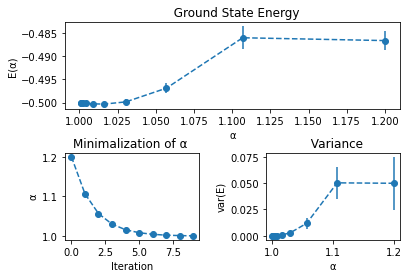

time taken for simulation : 89.17248964309692 s


In [6]:
print("This cell will give the optimal Ground state energy of the Hydrogen atom system:")
print()

# System parameters
System = Hydrogen
N_tries = 30000
N_walkers = 400
alpha_guess = 1.2

# plot settings
plots = False
subplots = True
plotsave = True

minimalEnergyFinder(alpha_guess, N_walkers, N_tries, System, plots, subplots, plotsave)

This cell will give the optimal Ground state energy of the Helium atom system:

alpha: 0.22112498699365157, iteration: 1
alpha: 0.1965966538794528, iteration: 2
alpha: 0.17797480686377165, iteration: 3
alpha: 0.16473751904674327, iteration: 4
alpha: 0.15606409961121637, iteration: 5
alpha: 0.15113287633355665, iteration: 6
alpha: 0.1481873610271347, iteration: 7
alpha: 0.1468431958951535, iteration: 8
alpha: 0.14621354922559449, iteration: 9

The energy was found to be minimal with α = 0.14621354922559449
The corresponding Energy is E = -2.8793613408643153 +/- 0.0036507916668288925
With variance var = 0.11237549675719637 +/- 0.001515418746446301 


Name your plot(without filetype):  min_Helium


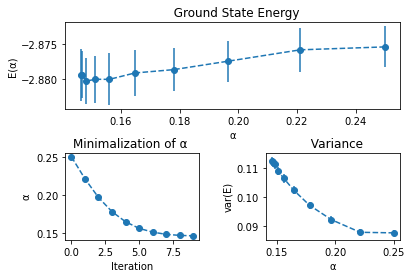

time taken for simulation : 223.88857078552246 s


In [7]:
print("This cell will give the optimal Ground state energy of the Helium atom system:")
print()

# System parameters
System = Helium
N_tries = 30000
N_walkers = 400
alpha_guess = 0.25

# plot settings
plots = False
subplots = True
plotsave = True

minimalEnergyFinder(alpha_guess, N_walkers, N_tries, System, plots, subplots, plotsave)